In [3]:
# Joeshwoa George Abo Hager Melek  20200131
# Mostafa Mohamed Nabil 20200548
# Osama Ibrahim Marzok  20200069
# Sameh Raouf Helmy 20200218
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [4]:
def perform_pca(X, k):
    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Compute the covariance matrix
    C = np.cov(X_centered, rowvar=False)

    # Compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(C)

    # Select the top k eigenvectors
    Q_matrix = eigenvectors[:, -k:]

    # Transform the data
    X_pca = X_centered @ Q_matrix

    # Calculate cumulative explained variance
    explained_variance = np.sum(eigenvalues[-k:]) / np.sum(eigenvalues)

    return X_pca, explained_variance

In [5]:
# Load the dataset
df = pd.read_csv('Country-data.csv')
df = df.drop(columns=['country'])
data = df.to_numpy()
data_meaned = data - np.mean(data, axis=0)
cov_matrix = np.cov(data_meaned)
evalues, evectors = np.linalg.eigh(cov_matrix)


In [6]:
# Determine the maximum value of k based on the number of features
max_k = min(data.shape[1], data.shape[0] - 1)

# Initialize lists to store results
explained_variances = []
k_values = list(range(1, max_k + 1))

# Perform PCA for different values of k
for k in k_values:
    _, explained_variance = perform_pca(data, k)
    explained_variances.append(explained_variance)



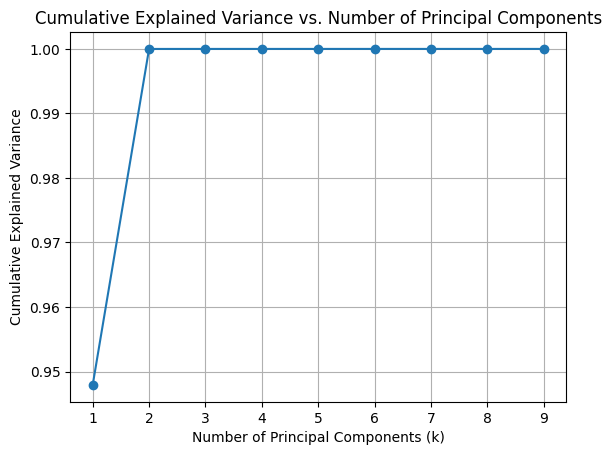

In [7]:
# Plot the cumulative explained variance
plt.plot(k_values, explained_variances, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
